# tips_regression

In [1]:
from sklearn import linear_model
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.shape

(244, 7)

In [6]:
print(df.sex.unique())
print(df.smoker.unique())
print(df.day.unique())
print(df.time.unique())

[Female, Male]
Categories (2, object): [Female, Male]
[No, Yes]
Categories (2, object): [No, Yes]
[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['sex'] = label_encoder.fit_transform(dfi['sex'])
print(label_encoder.classes_)
dfi['smoker'] = label_encoder.fit_transform(dfi['smoker'])
print(label_encoder.classes_)
dfi['day'] = label_encoder.fit_transform(dfi['day'])
print(label_encoder.classes_)
dfi['time'] = label_encoder.fit_transform(dfi['time'])
print(label_encoder.classes_)

['Female' 'Male']
['No' 'Yes']
['Fri' 'Sat' 'Sun' 'Thur']
['Dinner' 'Lunch']


In [18]:
X_data = dfi[['sex', 'smoker', 'day', 'time', 'total_bill']].values
y_data = dfi['tip'].values

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [20]:
model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [21]:
model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [22]:
y = model.predict(X_train)

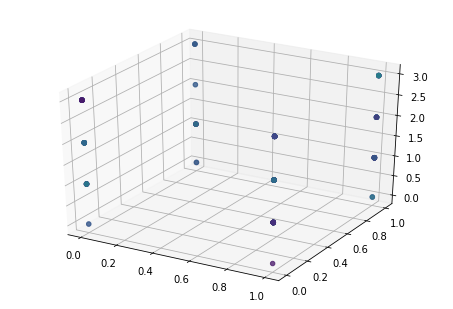

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y_train)
plt.show()

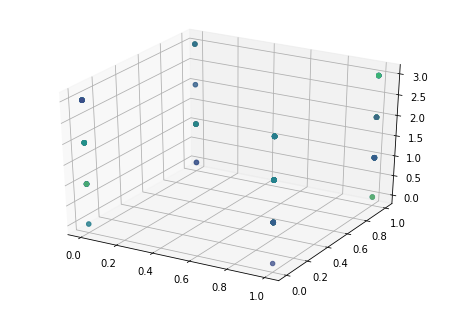

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c = y)
plt.show()

In [25]:
print(model.score(X_train, y_train))

0.40238792025323905


In [26]:
print(model.score(X_test, y_test))

0.5243765611278078


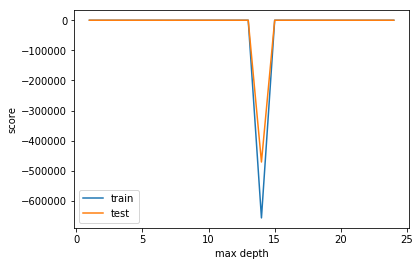

In [27]:
from sklearn.linear_model import SGDRegressor

train_score = []
test_score = []
depth_range = range(1, 25)

for depth in depth_range:
    model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3).fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))

plt.figure()
plt.plot(depth_range, train_score, label='train')
plt.plot(depth_range, test_score, label='test')
plt.legend()
plt.xlabel('max depth')
plt.ylabel('score')
plt.show()